<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import io
import requests

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/lluk4z/IF697-CienciaDeDados/main/data.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df = df.dropna(subset = ['stringency_category'])
df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
0,28320.0,3058.0,1735.714,1736.0,204.0,131.000,133.233,14.387,8.166,8.167,0.960,0.616,1.54,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.452093,3.239550,1.398634,0.187521,BRA,South America,Brazil,1586908800000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.309630,3.485437
1,33682.0,3257.0,2006.286,2141.0,217.0,154.857,158.459,15.323,9.439,10.072,1.021,0.729,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.527398,3.330617,1.398634,0.181844,BRA,South America,Brazil,1587081600000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.336460,3.512818
2,36658.0,2976.0,2275.857,2354.0,213.0,175.714,172.460,14.001,10.707,11.075,1.002,0.827,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.564169,3.371806,1.398634,0.181844,BRA,South America,Brazil,1587168000000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.328380,3.473633
3,50036.0,4279.0,2801.571,3331.0,425.0,201.000,235.398,20.131,13.180,15.671,1.999,0.946,1.49,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.699283,3.522575,1.398634,0.173186,BRA,South America,Brazil,1587600000000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.628389,3.631342
4,54043.0,4007.0,2908.714,3704.0,373.0,223.286,254.249,18.851,13.684,17.426,1.755,1.050,1.50,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.732739,3.568671,1.398634,0.176091,BRA,South America,Brazil,1587686400000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.571709,3.602819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,88173.114,256.662,238.677,2463.250,7.692,7.293,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.272817,5.718989,1.398634,-0.055517,BRA,South America,Brazil,1625270400000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,3.213518,4.736843
434,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273460,5.719677,1.398634,-0.055517,BRA,South America,Brazil,1625356800000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,2.919078,4.443779
435,18792511.0,22703.0,49158.429,525112.0,695.0,1574.286,88410.629,106.808,231.269,2470.425,3.270,7.406,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273985,5.720252,1.398634,-0.055517,BRA,South America,Brazil,1625443200000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,2.841985,4.356083
436,18855015.0,62504.0,48815.714,526892.0,1780.0,1558.143,88704.683,294.054,229.657,2478.799,8.374,7.330,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.275427,5.721722,1.398634,-0.055517,BRA,South America,Brazil,1625529600000000000,Em Desenvolvimento,Media_estringe

Transforma os dados categoricos em númericos

In [4]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["iso_code"] = LE.fit_transform(df["iso_code"])
df["hdi_category"] = LE.fit_transform(df["hdi_category"])
df["continent"] = LE.fit_transform(df["continent"])
df["location"] = LE.fit_transform(df["location"])
df["stringency_category"] = LE.fit_transform(df["stringency_category"])
df["aged_65_older_category"] = LE.fit_transform(df["aged_65_older_category"])
df["density_category"] = LE.fit_transform(df["density_category"])

df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
0,28320.0,3058.0,1735.714,1736.0,204.0,131.000,133.233,14.387,8.166,8.167,0.960,0.616,1.54,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.452093,3.239550,1.398634,0.187521,0,0,0,1586908800000000000,0,0,0,0,2.309630,3.485437
1,33682.0,3257.0,2006.286,2141.0,217.0,154.857,158.459,15.323,9.439,10.072,1.021,0.729,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.527398,3.330617,1.398634,0.181844,0,0,0,1587081600000000000,0,0,0,0,2.336460,3.512818
2,36658.0,2976.0,2275.857,2354.0,213.0,175.714,172.460,14.001,10.707,11.075,1.002,0.827,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.564169,3.371806,1.398634,0.181844,0,0,0,1587168000000000000,0,0,0,0,2.328380,3.473633
3,50036.0,4279.0,2801.571,3331.0,425.0,201.000,235.398,20.131,13.180,15.671,1.999,0.946,1.49,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.699283,3.522575,1.398634,0.173186,0,0,0,1587600000000000000,0,0,0,0,2.628389,3.631342
4,54043.0,4007.0,2908.714,3704.0,373.0,223.286,254.249,18.851,13.684,17.426,1.755,1.050,1.50,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.732739,3.568671,1.398634,0.176091,0,0,0,1587686400000000000,0,0,0,0,2.571709,3.602819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,88173.114,256.662,238.677,2463.250,7.692,7.293,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.272817,5.718989,1.398634,-0.055517,0,0,0,1625270400000000000,0,2,0,0,3.213518,4.736843
434,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273460,5.719677,1.398634,-0.055517,0,0,0,1625356800000000000,0,2,0,0,2.919078,4.443779
435,18792511.0,22703.0,49158.429,525112.0,695.0,1574.286,88410.629,106.808,231.269,2470.425,3.270,7.406,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273985,5.720252,1.398634,-0.055517,0,0,0,1625443200000000000,0,2,0,0,2.841985,4.356083
436,18855015.0,62504.0,48815.714,526892.0,1780.0,1558.143,88704.683,294.054,229.657,2478.799,8.374,7.330,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.275427,5.721722,1.398634,-0.055517,0,0,0,1625529600000000000,0,2,0,0,3.250420,4.795908


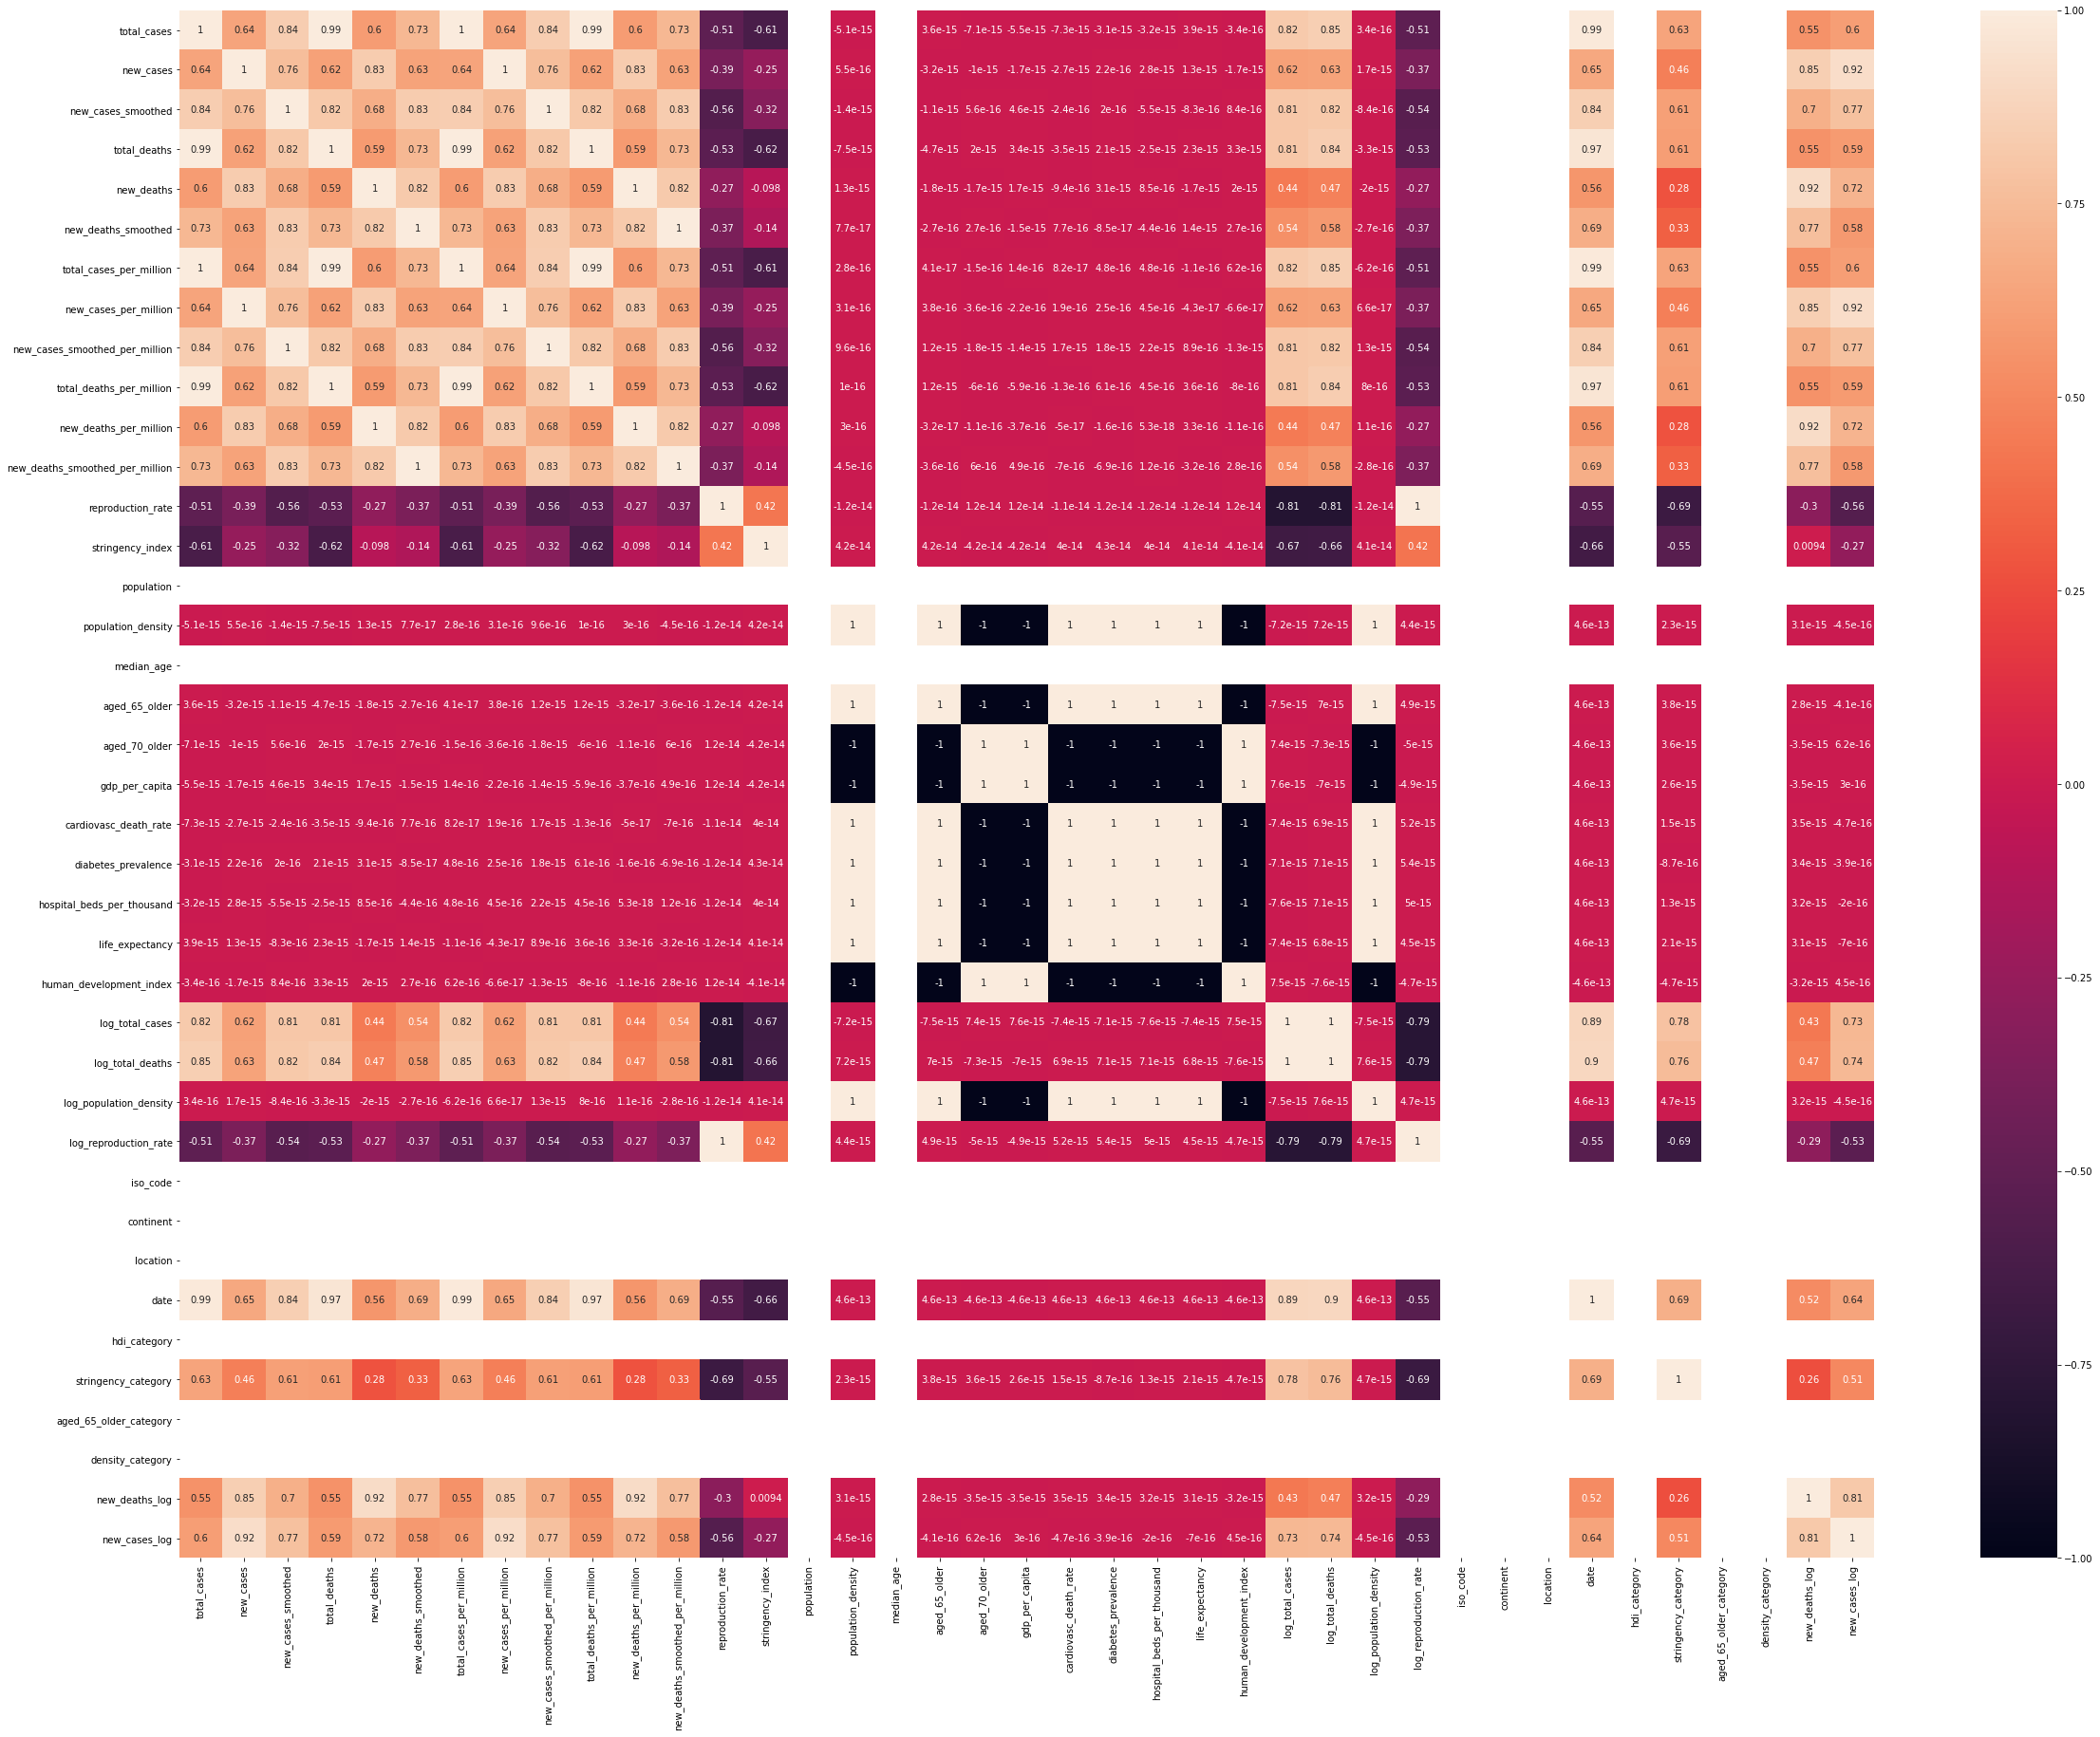

In [5]:
correlation_matrix = df.corr()
ax = plt.subplots(figsize=(40,30))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

Como agora só temos dados do Brasil, então algumas colunas têm valores iguais que não dão nenhuma informação, por isso vamos apaga-las

In [6]:
df_2 = df.drop(columns=['iso_code', 'continent', 'location', 'hdi_category', 'aged_65_older_category', 'density_category', 'population', 'median_age'])

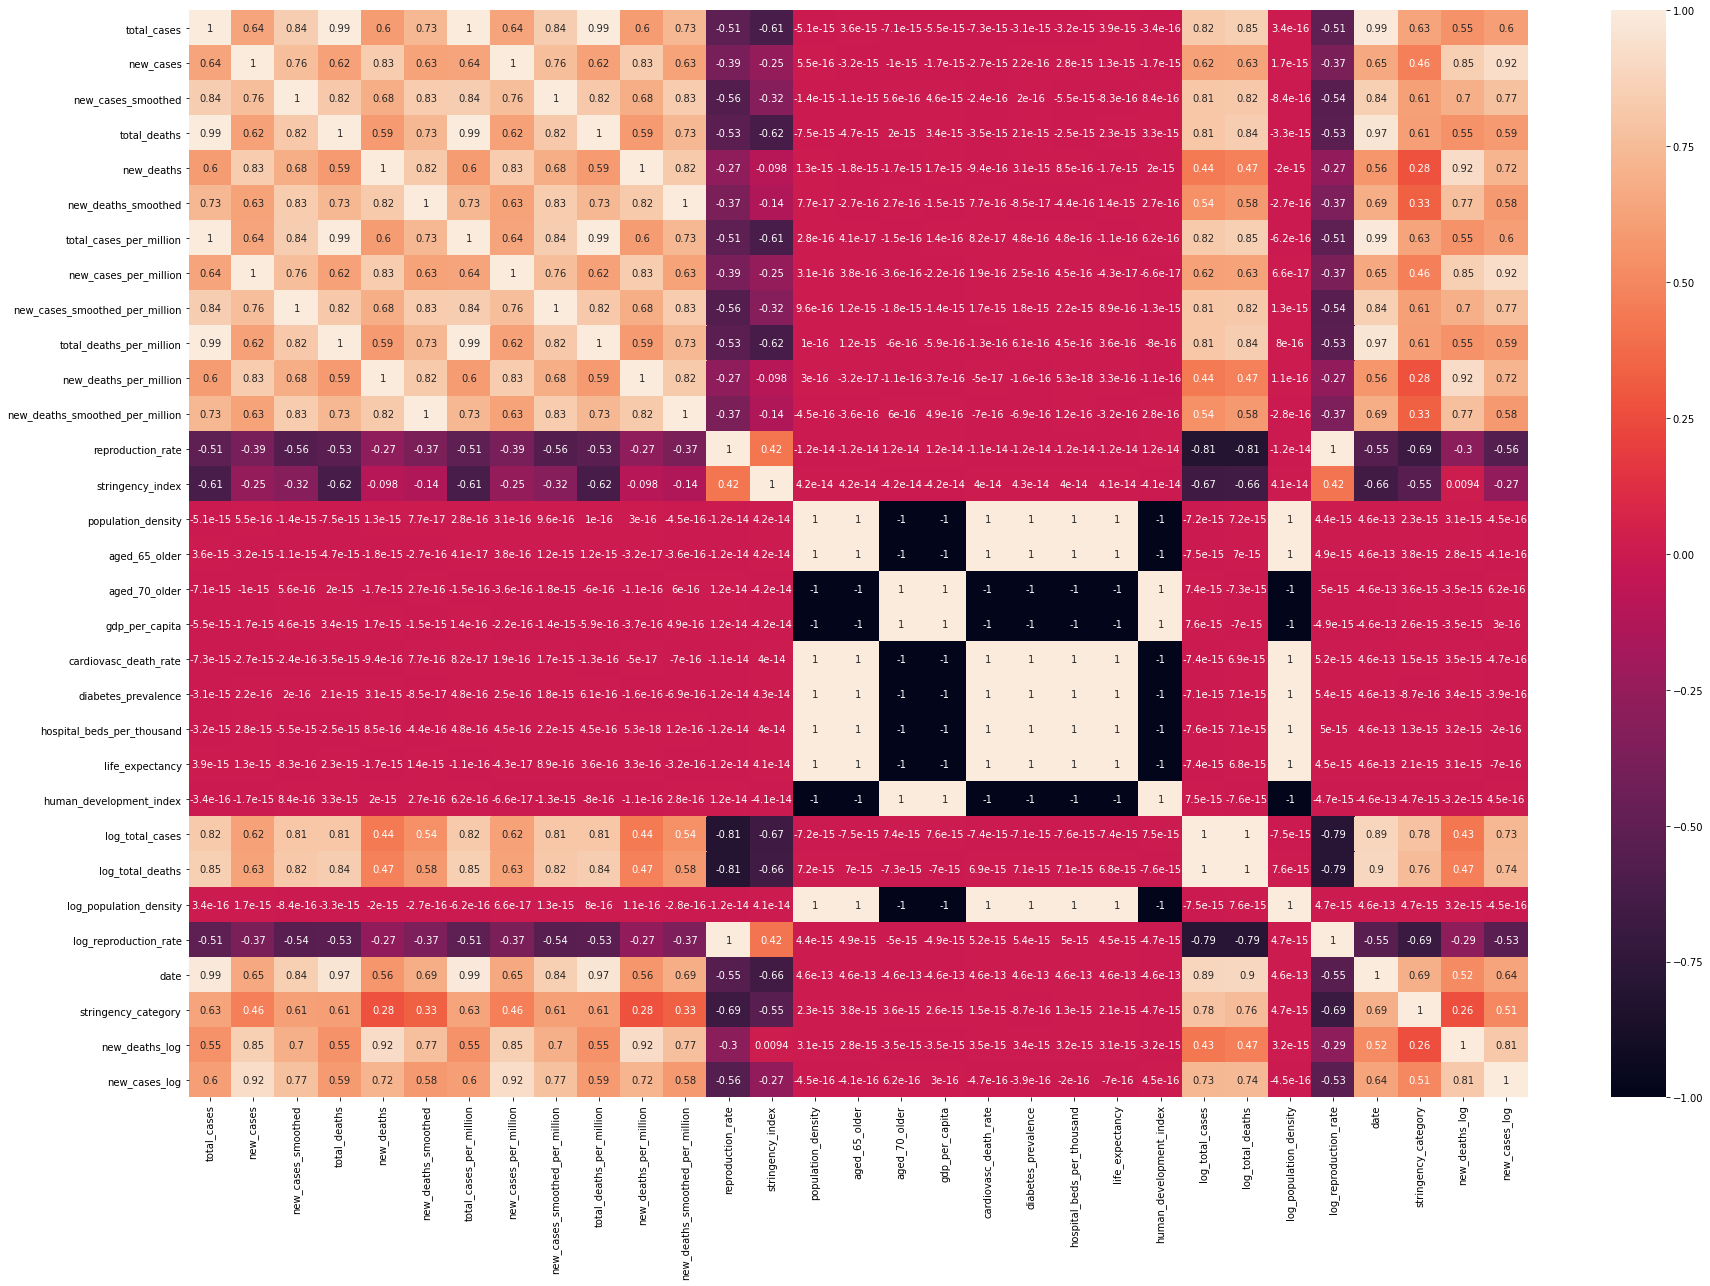

In [7]:
correlation_matrix = df_2.corr()
ax = plt.subplots(figsize=(30,20))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

In [8]:
#features = ['total_cases', 'new_cases', 'total_deaths', 'reproduction_rate', 'stringency_index']

In [9]:
X = np.array(df_2)

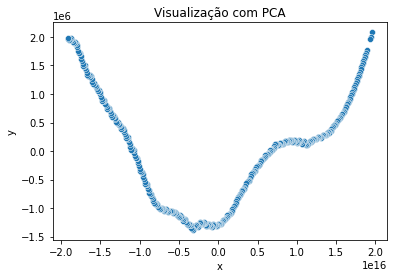

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 dimensoes
pc = pca.fit_transform(X)

pca_df = pd.DataFrame(pc, columns=['x', 'y'])

sb.scatterplot(data=pca_df, x='x', y='y', palette='Dark2')
plt.title("Visualização com PCA")
plt.show()

A coluna de data deixa os dados sem divisão, por isso optamos por exclui-la

In [11]:
X = np.array(df_2.drop(columns=['date']))

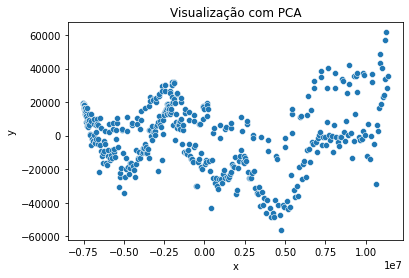

In [12]:
pca = PCA(n_components=2) # 2 dimensoes
pc = pca.fit_transform(X)

pca_df = pd.DataFrame(pc, columns=['x', 'y'])

sb.scatterplot(data=pca_df, x='x', y='y')
plt.title("Visualização com PCA")
plt.show()

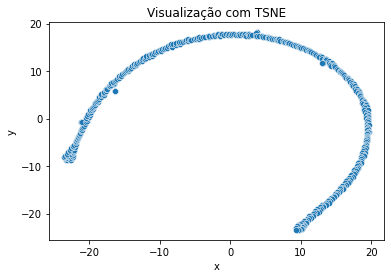

In [13]:
from sklearn.manifold import TSNE
data = TSNE().fit_transform(X)

tsne_df = pd.DataFrame(data, columns=['x', 'y'])

sb.scatterplot(data=tsne_df, x='x', y='y')
plt.title("Visualização com TSNE")
plt.show()

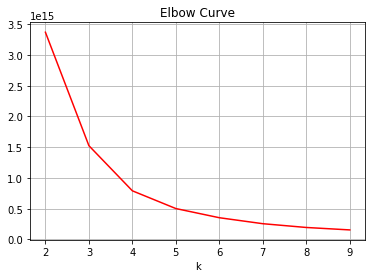

In [14]:
from sklearn.cluster import KMeans

distorsions = []

for k in range(2, 10):
  model = KMeans(n_clusters=k)
  model.fit(X)
  distorsions.append(model.inertia_)

plt.plot(range(2,10), distorsions, color='red')
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve')
plt.show()

# K-means

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init=20)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [16]:
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_
y_pred_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Visualizando os centróides dos grupos

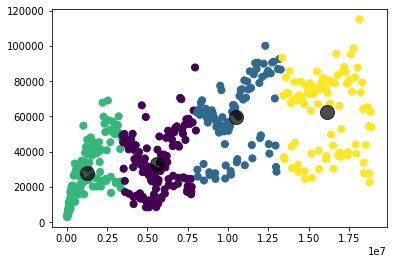

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


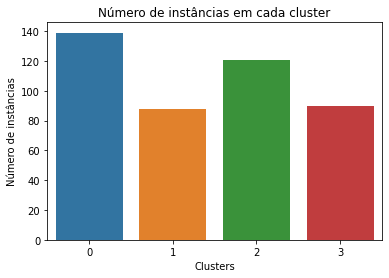

In [18]:
sb.countplot(y_pred_kmeans)
plt.xlabel('Clusters')
plt.ylabel('Número de instâncias')
plt.title('Número de instâncias em cada cluster')
plt.show()

Colocando a coluna label a partir do Kmeans para o dataframe

In [19]:
df_2.loc[:, 'label'] = y_pred_kmeans
df_2

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population_density,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,date,stringency_category,new_deaths_log,new_cases_log,label
0,28320.0,3058.0,1735.714,1736.0,204.0,131.000,133.233,14.387,8.166,8.167,0.960,0.616,1.54,74.54,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.452093,3.239550,1.398634,0.187521,1586908800000000000,0,2.309630,3.485437,2
1,33682.0,3257.0,2006.286,2141.0,217.0,154.857,158.459,15.323,9.439,10.072,1.021,0.729,1.52,74.54,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.527398,3.330617,1.398634,0.181844,1587081600000000000,0,2.336460,3.512818,2
2,36658.0,2976.0,2275.857,2354.0,213.0,175.714,172.460,14.001,10.707,11.075,1.002,0.827,1.52,74.54,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.564169,3.371806,1.398634,0.181844,1587168000000000000,0,2.328380,3.473633,2
3,50036.0,4279.0,2801.571,3331.0,425.0,201.000,235.398,20.131,13.180,15.671,1.999,0.946,1.49,74.54,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.699283,3.522575,1.398634,0.173186,1587600000000000000,0,2.628389,3.631342,2
4,54043.0,4007.0,2908.714,3704.0,373.0,223.286,254.249,18.851,13.684,17.426,1.755,1.050,1.50,74.54,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.732739,3.568671,1.398634,0.176091,1587686400000000000,0,2.571709,3.602819,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,88173.114,256.662,238.677,2463.250,7.692,7.293,0.88,60.65,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.272817,5.718989,1.398634,-0.055517,1625270400000000000,2,3.213518,4.736843,3
434,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,60.65,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273460,5.719677,1.398634,-0.055517,1625356800000000000,2,2.919078,4.443779,3
435,18792511.0,22703.0,49158.429,525112.0,695.0,1574.286,88410.629,106.808,231.269,2470.425,3.270,7.406,0.88,60.65,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273985,5.720252,1.398634,-0.055517,1625443200000000000,2,2.841985,4.356083,3
436,18855015.0,62504.0,48815.714,526892.0,1780.0,1558.143,88704.683,294.054,229.657,2478.799,8.374,7.330,0.88,60.65,25.04,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.275427,5.721722,1.398634,-0.055517,1625529600000000000,2,3.250420,4.795908,3


# Métricas de Avaliação

### Silhouette Score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


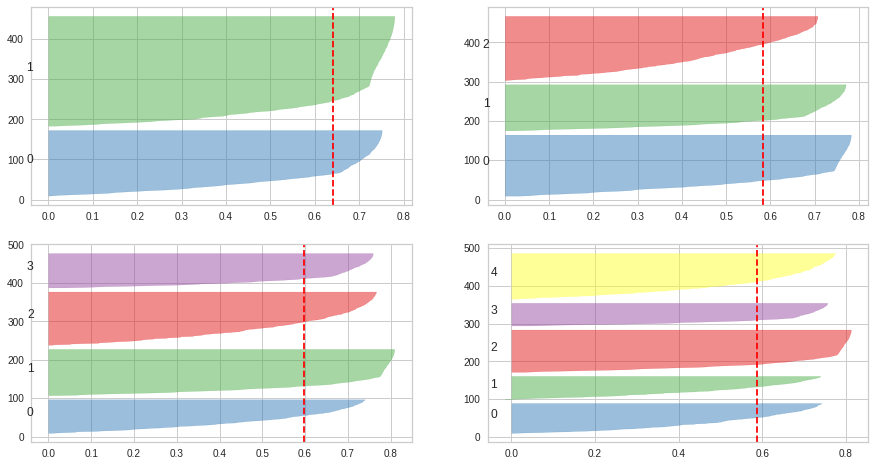

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in range(2, 6):
  kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
  q, mod = divmod(i, 2)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

# Classificação

Divisão dos dados em treino, validação e teste

In [21]:
from sklearn.model_selection import train_test_split

X = df_2.drop(columns=['label', 'date'], axis=1)
y = df_2['label']

#20% dos dados para TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#20% dos dados para VALIDAÇÃO (0.25 * 0.8 = 0.2)
#60% dos dados para TREINAMENTO
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [22]:
!pip install optuna --quiet
!pip install mlflow --quiet
!pip install pyngrok --quiet

     |████████████████████████████████| 302 kB 6.8 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 164 kB 57.7 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 111 kB 55.2 MB/s 
     |████████████████████████████████| 141 kB 31.3 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 146 kB 64.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 170 kB 69.0 MB/s 
     |████████████████████████████████| 1.1 MB 68.0 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 636 kB 76.5 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 746 kB 8.8 MB/s 


In [23]:
# Data analysis library
import numpy as np
import pandas as pd
import joblib

# Machine Learning library
import sklearn
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric

# Model experimentation library
import mlflow
import mlflow.lightgbm
from mlflow.tracking import MlflowClient

# Hyperparameter tunning library
import optuna

# Plotting library
import matplotlib.pyplot as plt
# Prevent figures from displaying by turning interactive mode off using the function
plt.ioff()
import warnings
warnings.filterwarnings("ignore")

In [24]:
with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://973f99a9c18b.ngrok.io


In [25]:
experiment_name = "experiments_v1"
artifact_repository = './mlflow-run'

# Provide uri and connect to your tracking server
mlflow.set_tracking_uri(ngrok_tunnel.public_url)

# Initialize client
client = MlflowClient()

# If experiment doesn't exist then it will create new
# else it will take the experiment id and will use to to run the experiments
try:
    # Create experiment 
    experiment_id = client.create_experiment(experiment_name, artifact_location=artifact_repository)
except:
    # Get the experiment id if it already exists
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id

t=2021-08-15T22:28:13+0000 lvl=warn msg="failed to open private leg" id=3ebdcb7244ff privaddr=localhost:5000 err="dial tcp 127.0.0.1:5000: connect: connection refused"
2021/08/15 22:28:14 ERROR mlflow.utils.rest_utils: API request to https://973f99a9c18b.ngrok.io/api/2.0/mlflow/experiments/create failed with code 502 != 200, retrying up to 2 more times. API response body: 
<!doctype html5>
<html>
    <head>
        <style type="text/css">
         
        strong { font-weight: bold; }
        hr { -moz-box-sizing: content-box; box-sizing: content-box; height: 0; }
        html { font-family: sans-serif;   -ms-text-size-adjust: 100%;   -webkit-text-size-adjust: 100%;   } body { margin: 0; }
        a { background-color: transparent; }
        a:active, a:hover { outline: 0; }
        </style>

        <style type="text/css">
            body { background-color: #f5f5f5; }
            .container { width: 500px; margin: auto; color: #444; padding: 5px; }
            a, strong { color: pu

In [32]:
!mkdir images

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [29]:
def model_experimentation(classifier, param, model_name, run_name):
    # Launching Multiple Runs in One Program.This is easy to do because the ActiveRun object returned by mlflow.start_run() is a 
    # Python context manager. You can “scope” each run to just one block of code as follows:
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Get run id 
        run_id = run.info.run_uuid
        
        # Provide brief notes about the run
        #MlflowClient().set_tag(run_id,
        #                       "mlflow.note.content",
        #                       "This is experiment for exploring different machine learning models for Campus Recruitment Dataset")

        # To enable autologging for scikit-learn estimators.
        # 1) Log estimator parameters
        # 2) Log common metrics for classifier
        # 3) Log model Artifacts
        mlflow.sklearn.autolog()

        # Define custom tag
        #tags = {"Application": "Payment Monitoring Platform",
        #        "release.candidate": "PMP",
        #        "release.version": "2.2.0"}
        
        # Set Tag
        #mlflow.set_tags(tags)
                        
        # Log python environment details
        #mlflow.log_artifact('requirements.txt')
        
        # Perform model training
        clf = classifier(**param)
        clf.fit(X_train, y_train)

        # Perform model evaluation
        valid_prediction = clf.predict(X_valid) 
        acc = accuracy_score(y_valid, valid_prediction)
        #jaccard = jaccard_score(y_valid, valid_prediction, average=None)

        # Perform model evaluation 
        #valid_prediction = clf.predict_proba(X_valid)[:, 1]
        #fpr, tpr, thresholds = roc_curve(y_valid, valid_prediction)
        #roc_auc = auc(fpr, tpr) # compute area under the curve
        #print("=====================================")
        #print("Validation AUC:{}".format(roc_auc))
        #print("=====================================")
        
        # log metrics
        mlflow.log_metrics({"Validation_Accuracy": acc})

        # Plot and save metrics details    
        plot_confusion_matrix(clf, X_valid, y_valid, 
                              display_labels=[0,1,2,3],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = f'./images/{model_name}_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename) 

        # Plot and save AUC details  
        #plot_roc_curve(clf, X_valid, y_valid, name='Validation')
        #plt.title('ROC AUC Curve')
        #filename = f'./images/{model_name}_validation_roc_curve.png'
        #plt.savefig(filename)
        # log model artifacts
        #mlflow.log_artifact(filename)

        return acc

In [34]:
def objective_RF(trial):

    classifier = RandomForestClassifier
    param = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 32, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "random_state": 0
    }
    model_name = 'rf'
    run_name = 'randomForest_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name)
    return accuracy

[I 2021-08-15 22:29:25,643] A new study created in memory with name: no-name-8034ca27-0dbf-402f-b285-21ef2a419b2c
[I 2021-08-15 22:29:28,718] Trial 0 finished with value: 0.9886363636363636 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 305}. Best is trial 0 with value: 0.9886363636363636.
[I 2021-08-15 22:29:31,314] Trial 1 finished with value: 0.9886363636363636 and parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 108}. Best is trial 0 with value: 0.9886363636363636.
[I 2021-08-15 22:29:34,511] Trial 2 finished with value: 0.9886363636363636 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'n_estimators': 350}. Best is trial 0 with value: 0.9886363636363636.
[I 2021-08-15 22:29:37,002] Trial 3 finished with value: 0.9886363636363636 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 130}. Best is trial 0 with value: 0.9886363636363636.
[I 2021-08-15 22:29:40,008] Trial 4 finished with value: 0.9886363636363636 and

RF - Accuracy: 0.9886363636363636
RF - Best hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 305}


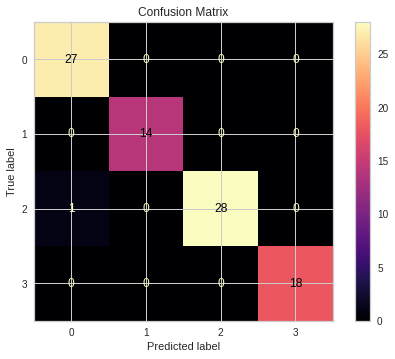

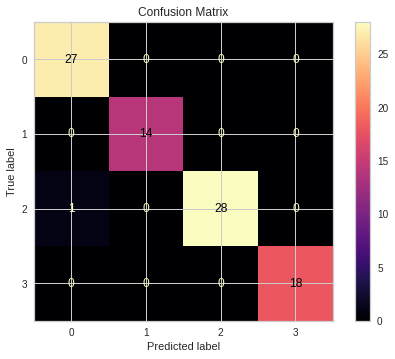

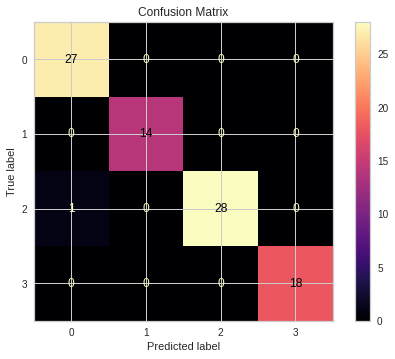

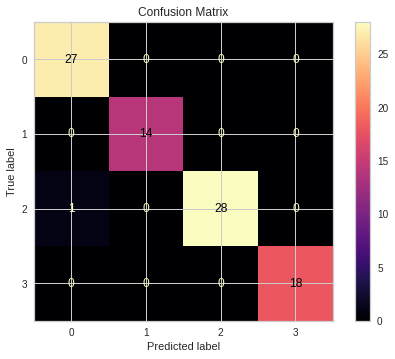

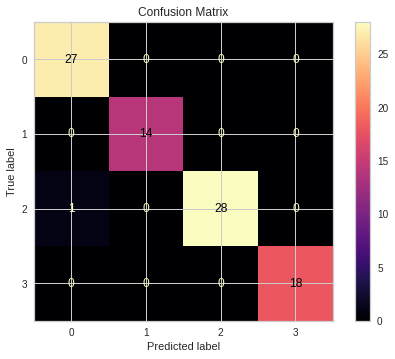

In [35]:
# Create a study object and optimize the objective function.
study_RF = optuna.create_study(direction='maximize')
study_RF.optimize(objective_RF, n_trials=5)
trial_RF = study_RF.best_trial
print('RF - Accuracy: {}'.format(trial_RF.value))
print("RF - Best hyperparameters: {}".format(trial_RF.params))

In [36]:
def objective_KNN(trial):

    classifier = KNeighborsClassifier
    param = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 10, step=1,),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "algorithm": trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    }
    model_name = 'KNN'
    run_name = 'KNN_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name)
    return accuracy

[I 2021-08-15 22:30:52,972] A new study created in memory with name: no-name-4db31403-2ec9-449c-93e6-af7dae8280ea
[I 2021-08-15 22:30:55,275] Trial 0 finished with value: 0.9772727272727273 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 0 with value: 0.9772727272727273.
[I 2021-08-15 22:30:57,656] Trial 1 finished with value: 0.9886363636363636 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'brute'}. Best is trial 1 with value: 0.9886363636363636.
[I 2021-08-15 22:30:59,942] Trial 2 finished with value: 0.9772727272727273 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 1 with value: 0.9886363636363636.
[I 2021-08-15 22:31:02,225] Trial 3 finished with value: 0.9772727272727273 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 1 with value: 0.9886363636363636.
[I 2021-08-15 22:31:04,476] Trial 4 finished with value: 0.988636363

KNN - Accuracy: 0.9886363636363636
KNN - Best hyperparameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'brute'}


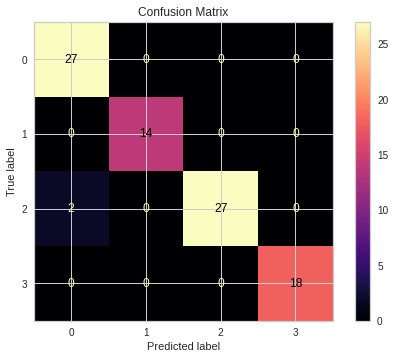

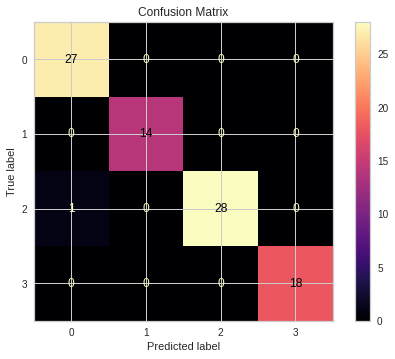

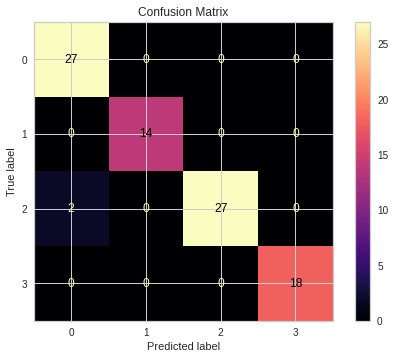

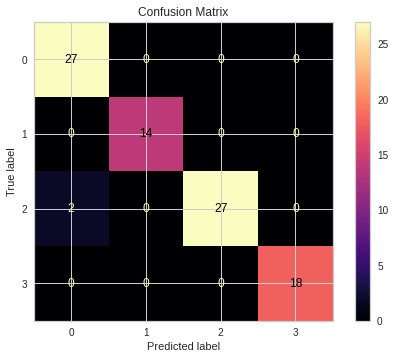

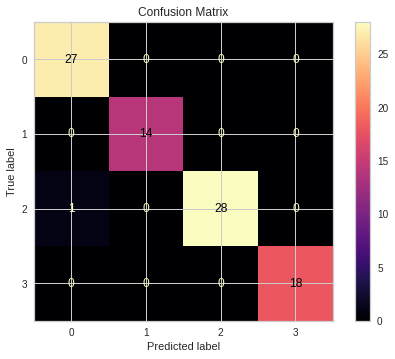

In [38]:
# Create a study object and optimize the objective function.
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_KNN, n_trials=5)
trial_knn = study_knn.best_trial
print('KNN - Accuracy: {}'.format(trial_knn.value))
print("KNN - Best hyperparameters: {}".format(trial_knn.params))

In [40]:
def objective_SVM(trial):

    classifier = LinearSVC
    param = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "max_iter": trial.suggest_int("max_iter", 500, 2000, step=500),
        "multi_class": trial.suggest_categorical("multi_class", ["crammer_singer"]),
        "random_state": 0
    }
    model_name = 'SVM'
    run_name = 'SVM_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name)
    return accuracy

[I 2021-08-15 22:42:49,891] A new study created in memory with name: no-name-5c22aafd-60a5-4911-8914-040457725a69
[I 2021-08-15 22:42:55,952] Trial 0 finished with value: 0.5227272727272727 and parameters: {'penalty': 'l1', 'max_iter': 500, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.5227272727272727.
[I 2021-08-15 22:43:01,932] Trial 1 finished with value: 0.5227272727272727 and parameters: {'penalty': 'l1', 'max_iter': 500, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.5227272727272727.
[I 2021-08-15 22:43:07,904] Trial 2 finished with value: 0.5227272727272727 and parameters: {'penalty': 'l1', 'max_iter': 2000, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.5227272727272727.
[I 2021-08-15 22:43:13,875] Trial 3 finished with value: 0.5227272727272727 and parameters: {'penalty': 'l1', 'max_iter': 1000, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.5227272727272727.
[I 2021-08-15 22:43:20,036] Trial 4 finished wit

SVM - Accuracy: 0.5227272727272727
SVM - Best hyperparameters: {'penalty': 'l1', 'max_iter': 500, 'multi_class': 'crammer_singer'}


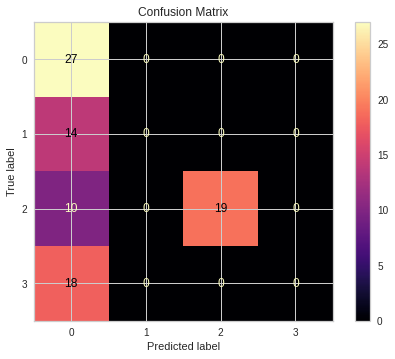

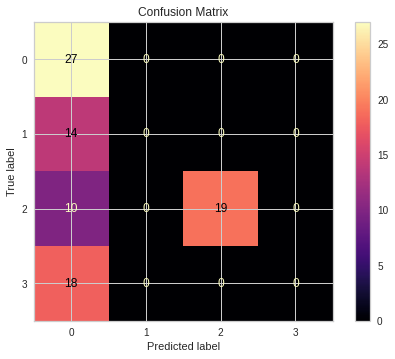

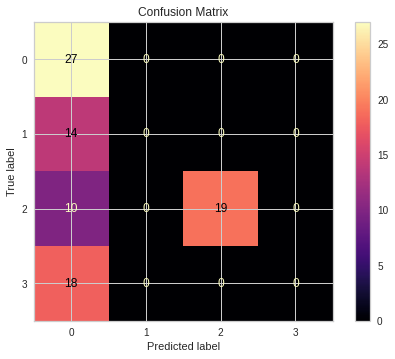

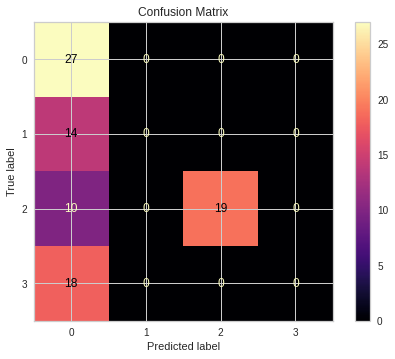

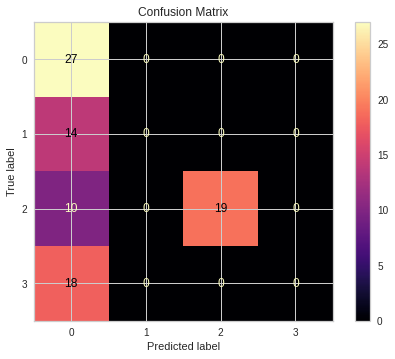

In [41]:
# Create a study object and optimize the objective function.
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_SVM, n_trials=5)
trial_svm = study_svm.best_trial
print('SVM - Accuracy: {}'.format(trial_svm.value))
print("SVM - Best hyperparameters: {}".format(trial_svm.params))

In [44]:
def objective_MLP(trial):

    classifier = MLPClassifier
    param = {
        "activation": trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"]),
        "solver": trial.suggest_categorical("solver", ["adam", "sgd"]),
        "learning_rate_init": trial.suggest_float("learning_rate_init", 0.001, 0.010, step=0.001),
        "random_state": 0
    }
    model_name = 'MLP'
    run_name = 'MLP_model'

    accuracy = model_experimentation(classifier, param, model_name, run_name)
    return accuracy

[I 2021-08-15 22:59:01,484] A new study created in memory with name: no-name-5454841d-6a89-43c6-9f6a-691d9222bd27
[I 2021-08-15 22:59:04,362] Trial 0 finished with value: 0.6931818181818182 and parameters: {'activation': 'identity', 'solver': 'adam', 'learning_rate_init': 0.005}. Best is trial 0 with value: 0.6931818181818182.
[I 2021-08-15 22:59:06,996] Trial 1 finished with value: 0.7613636363636364 and parameters: {'activation': 'identity', 'solver': 'adam', 'learning_rate_init': 0.008}. Best is trial 1 with value: 0.7613636363636364.
[I 2021-08-15 22:59:09,641] Trial 2 finished with value: 0.5795454545454546 and parameters: {'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.007}. Best is trial 1 with value: 0.7613636363636364.
[I 2021-08-15 22:59:12,313] Trial 3 finished with value: 0.8295454545454546 and parameters: {'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.008}. Best is trial 3 with value: 0.8295454545454546.
[I 2021-08-15 22:59:14,567] Trial 

MLP - Accuracy: 0.8295454545454546
MLP - Best hyperparameters: {'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.008}


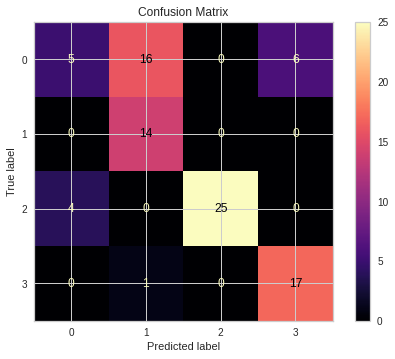

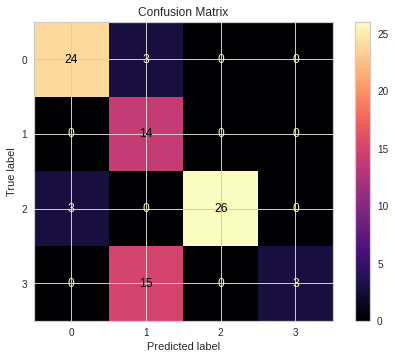

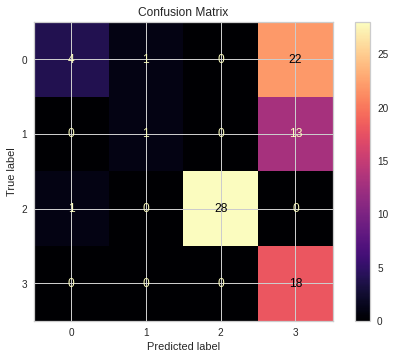

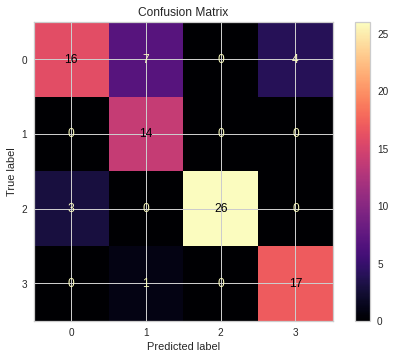

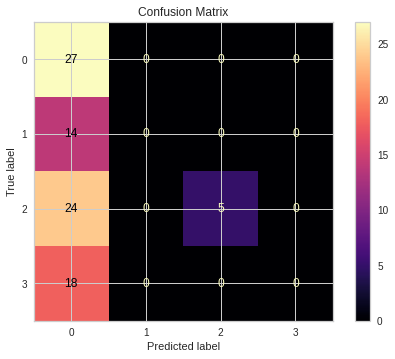

In [45]:
# Create a study object and optimize the objective function.
study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_MLP, n_trials=5)
trial_mlp = study_mlp.best_trial
print('MLP - Accuracy: {}'.format(trial_mlp.value))
print("MLP - Best hyperparameters: {}".format(trial_mlp.params))

In [ ]:
"""
def objective(trial):

    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "learning_rate": trial.suggest_float("learning_rate", 1e-2, 1e-1, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "random_state": 0,
    }
    
    multi_log_loss = model_training_tracking(param)
    return multi_log_loss
"""

In [ ]:
"""
def model_training_tracking(params):
    # Launching Multiple Runs in One Program.This is easy to do because the ActiveRun object returned by mlflow.start_run() is a 
    # Python context manager. You can “scope” each run to just one block of code as follows:
    with mlflow.start_run(experiment_id=experiment_id, run_name='Lightgbm_model') as run:
        # Get run id 
        run_id = run.info.run_uuid
        
        # Set the notes for the run
        MlflowClient().set_tag(run_id,
                               "mlflow.note.content",
                               "This is experiment for hyperparameter optimzation for lightgbm models for the Campus Recruitment Dataset")
        
        # Define customer tag
        tags = {"Application": "Payment Monitoring Platform",
                "release.candidate": "PMP",
                "release.version": "2.2.0"}

        # Set Tag
        mlflow.set_tags(tags)
                        
        # Log python environment details
        #mlflow.log_artifact('requirements.txt')
        
        # logging params
        mlflow.log_params(params)

        # Perform model training
        lgb_clf = LGBMClassifier(**params)
        lgb_clf.fit(X_train, y_train, 
                    eval_set = [(X_train, y_train), (X_valid, y_valid)], 
                    early_stopping_rounds=50,
                    verbose=20)

        # Log model artifacts
        #mlflow.sklearn.log_model(lgb_clf, "model")
        #lgb_valid_prediction = lgb_clf.predict_proba(X_valid)[:, 1]
        #rmse = np.sqrt(mean_squared_error(y_valid, lgb_valid_prediction))
        #print("=====================================")
        #print("Validation RMSE:{}".format(rmse))
        #print("=====================================") 

        # Log model artifacts
        #mlflow.sklearn.log_model(lgb_clf, "model")
        lgb_valid_prediction = lgb_clf.predict_proba(X_valid)
        multi_log_loss = log_loss(y_valid, lgb_valid_prediction, labels=[0,1,2,3])
        #rmse = np.sqrt(mean_squared_error(y_valid, lgb_valid_prediction))
        print("=====================================")
        print("Validation Multi_log_loss:{}".format(multi_log_loss))
        print("=====================================") 

        # Perform model evaluation 
        #lgb_valid_prediction = lgb_clf.predict_proba(X_valid)[:, 1]
        #fpr, tpr, thresholds = roc_curve(y_valid, lgb_valid_prediction)
        #roc_auc = auc(fpr, tpr) # compute area under the curve
        #print("=====================================")
        #print("Validation AUC:{}".format(roc_auc))
        #print("=====================================")   

        # log metrics
        #mlflow.log_metrics({"Validation_AUC": roc_auc})

        # Plot and save feature importance details
        ax = plot_importance(lgb_clf, height=0.4)
        filename = './images/lgb_validation_feature_importance.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

        ax = plot_metric(lgb_clf.evals_result_)
        filename = './images/lgb_validation_metrics_comparision.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

        # Plot and save metrics details    
        plot_confusion_matrix(lgb_clf, X_valid, y_valid, 
                              display_labels=['Placed', 'Not Placed'],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = './images/lgb_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

        # Plot and save AUC details  
        #plot_roc_curve(lgb_clf, X_valid, y_valid, name='Validation')
        #plt.title('ROC AUC Curve')
        #filename = './images/lgb_validation_roc_curve.png'
        #plt.savefig(filename)
        # log model artifacts
        #mlflow.log_artifact(filename)
        return multi_log_loss
"""